In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import windIO
import windOF as foam
import wind
import calcSSL

In [75]:
# turn on latex rendering for matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# set the font that is slightly thicker than the default LaTeX font
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'


In [65]:
workDir = "D:/tempData_depot/simData_FFS/"
caseName_ABL = "FFS_ABL_00.0"
caseDir_ABL = workDir + caseName_ABL + "/"
caseName_SBL = "FFS_SBL_00.0"
caseDir_SBL = workDir + caseName_SBL + "/"

figDir = workDir + "__plots/"

In [4]:
planeShape = (1216,251)

In [5]:
# raw_SSL_file = os.path.join(workDir, caseName, "extracts/SSL_data.csv")
# raw_SSL_data = pd.read_csv(raw_SSL_file, index_col=None)

In [6]:
# x = np.reshape(raw_SSL_data["Points:0"].values, planeShape)
# y = np.reshape(raw_SSL_data["Points:1"].values, planeShape)
# z = np.reshape(raw_SSL_data["Points:2"].values, planeShape) - 0.08
# U = np.reshape(raw_SSL_data["UMean:0"].values, planeShape)
# V = np.reshape(raw_SSL_data["UMean:1"].values, planeShape)
# W = np.reshape(raw_SSL_data["UMean:2"].values, planeShape)
# p = np.reshape(raw_SSL_data["p"].values, planeShape)
# P = np.reshape(raw_SSL_data["pMean"].values, planeShape)
# pp = np.reshape(raw_SSL_data["pPrime2Mean"].values, planeShape)
# uu = np.reshape(raw_SSL_data["UPrime2Mean:0"].values, planeShape)
# vv = np.reshape(raw_SSL_data["UPrime2Mean:1"].values, planeShape)
# ww = np.reshape(raw_SSL_data["UPrime2Mean:2"].values, planeShape)
# uv = np.reshape(raw_SSL_data["UPrime2Mean:3"].values, planeShape)
# vw = np.reshape(raw_SSL_data["UPrime2Mean:4"].values, planeShape)
# uw = np.reshape(raw_SSL_data["UPrime2Mean:5"].values, planeShape)
# tke = np.reshape(raw_SSL_data["TKE"].values, planeShape)
# nut = np.reshape(raw_SSL_data["nut"].values, planeShape)
# nutMean = np.reshape(raw_SSL_data["nutMean"].values, planeShape)
# nutVar = np.reshape(raw_SSL_data["nutPrime2Mean"].values, planeShape)

# ssl = calcSSL.SSL(x=x, y=z, U=U, V=W, W=V, uu=uu, ww=vv, vv=ww, uw=uv, vw=vw, uv=uw, tke=tke, p=p, P=P, pp=pp, nut=nut, nutMean=nutMean, nutVar=nutVar, origin=(0,0),
#                   xDim=0, normal=(0,1,0), pathSmoothWin=25)

# data = {
#     "x": x,
#     "y": y,
#     "z": z,
#     "U": U,
#     "V": V,
#     "W": W,
#     "p": p,
#     "P": P,
#     "pp": pp,
#     "uu": uu,
#     "vv": vv,
#     "ww": ww,
#     "uv": uv,
#     "vw": vw,
#     "uw": uw,
#     "TKE": tke,
#     "nut": nut,
#     "nutMean": nutMean,
#     "nutVar": nutVar,
# }


# Profiles

In [11]:
prof_ABL = foam.readVelProfile(caseDir=caseDir_ABL, probeName='probes.zProfile.x-0.3', name='ABL', writeToFile=True, readFromNPY_file=True, readPressure=False, H=0.08)
prof_SBL = foam.readVelProfile(caseDir=caseDir_SBL, probeName='probes.zProfile.x-0.3', name='SBL', writeToFile=True, readFromNPY_file=True, readPressure=False, H=0.08)

Processing OpenFOAM case:	D:/tempData_depot/simData_FFS/FFS_ABL_00.0/
Probe read from:		D:/tempData_depot/simData_FFS/FFS_ABL_00.0//postProcessing/probes.zProfile.x-0.3
  >> Reading probe data ...
  >> Reading data from NPY file.
             << Done!
  >> Processing profile data.
             << Done!
  >> Finished reading probe data.
Processing OpenFOAM case:	D:/tempData_depot/simData_FFS/FFS_SBL_00.0/
Probe read from:		D:/tempData_depot/simData_FFS/FFS_SBL_00.0//postProcessing/probes.zProfile.x-0.3
  >> Reading probe data ...
  >> Reading data from NPY file.
             << Done!
  >> Processing profile data.
             << Done!
  >> Finished reading probe data.


D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\wind.py:710: RuntimeWarning: invalid value encountered in log
  U_func = lambda Z, uStar, z0: uStar / VON_KARMAN_CONST * np.log((Z - d) / z0)
D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\wind.py:2849: RuntimeWarning: invalid value encountered in power
  Z = self.Z if Z is None else Z


0.000313720705093628

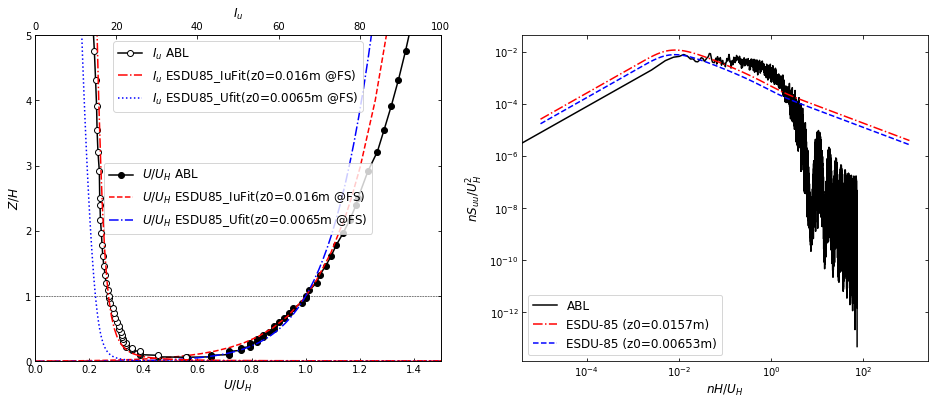

In [43]:
prof_ABL.lScl = 1/50.0
prof_ABL.workSect_zLim = np.asarray([0, 5*0.08])
prof_ABL.fit_z0(ESDUversion='ESDU85')

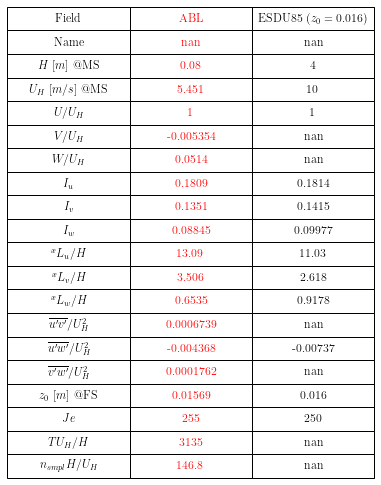

Future feature: include a table of normalizers like H, Uref, etc. next to the legend.


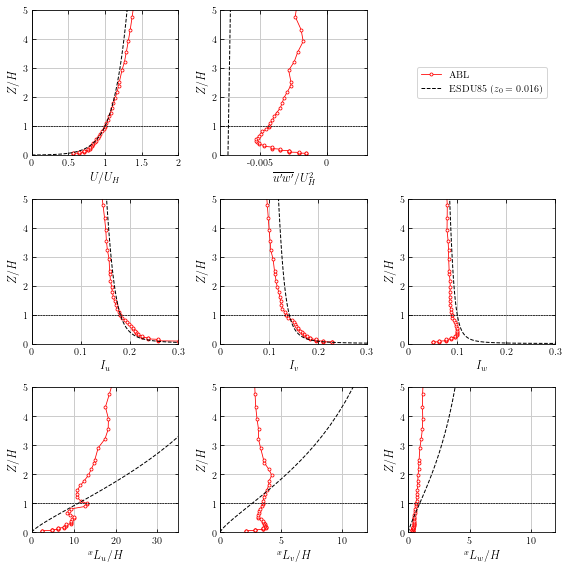

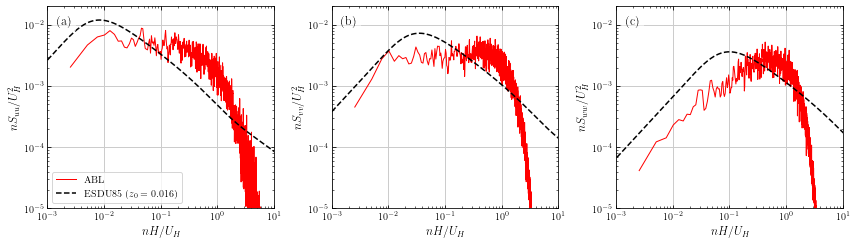

In [94]:
esdu = wind.ESDU85(z0=0.016, Zref=4)
es74 = wind.ESDU74(z0=0.016, Zref=4)
esdu = esdu.toProfileObj()
es74 = es74.toProfileObj()

esdu.name = 'ESDU85 ($z_0='+ esdu.z0_Iu.__str__() + '$)'
es74.name = 'ESDU74 ($z_0='+ es74.z0_Iu.__str__() + '$)'
esdu.SpectH.name = esdu.name
es74.SpectH.name = es74.name

# profs = wind.Profiles([prof_ABL, esdu.toProfileObj()])
profs = wind.Profiles([prof_ABL, esdu, es74])
# profs = wind.Profiles([prof_ABL, prof_SBL])

fig_table, _ = profs.plotParamsTable(params='all',fontSz=12,colTxtColors=['r','k','b'],showBorder=True,cell_size=[1.5,0.3])
fig_prof, _ = profs.plotProfile_basic2(figsize=[8,8],
                        yLimits=[0,5],
                        xLimits_U=[0, 2], xLimits_uw=[-0.008, 0.003],
                        xLimits_Iu=[0,0.3], xLimits_Iv=[0,0.3], xLimits_Iw=[0,0.3],
                        xLimits_xLu=[0, 35], xLimits_xLv=[0,12], xLimits_xLw=[0,12],
                        normalize=True,
                        kwargs_plt=[
                            {'color': 'r', 'linewidth':0.8, 'linestyle': '-',    'marker': 'o', 'markersize':3, 'markerfacecolor':'w', 'markeredgewidth':0.8},
                            {'color': 'k', 'linewidth':1.0, 'linestyle': '--',    'marker': 'None', 'markersize':4, 'markerfacecolor':'w'},
                            {'color': 'b', 'linewidth':1.0, 'linestyle': '-',    'marker': 'None', 'markersize':4, 'markerfacecolor':'w'},
                            {'color': 'g', 'linewidth':1.0, 'linestyle': '-',    'marker': 'None', 'markersize':4, 'markerfacecolor':'w'},
                            ],)

fig_spect, _ = profs.plotSpect(
                # figsize=[15,6],
                # xLimits=[1e-3,1e2],
                figsize=[12,3.5],
                yLimits=[[1e-5,0.02],[1e-5,0.02],[1e-5,0.02]],
                xLimits=[1e-3,1e1],
                kwargs_plt=[
                            {'color': 'r', 'linewidth':1,   'linestyle': '-',    'marker': 'None', 'markersize':4, 'markerfacecolor':'w'},
                            {'color': 'k', 'linewidth':1.5, 'linestyle': '--',   'marker': 'None', 'markersize':4, 'markerfacecolor':'w'},
                            {'color': 'b', 'linewidth':1.5, 'linestyle': '-',    'marker': 'None', 'markersize':4, 'markerfacecolor':'w'},
                            {'color': 'g', 'linewidth':1.5, 'linestyle': '-',    'marker': 'None', 'markersize':4, 'markerfacecolor':'w'},
                            ],
                        )

# # save figures
# fig_table.savefig(figDir+'paramTable.svg', bbox_inches='tight')
# fig_prof.savefig(figDir+'profiles.svg', bbox_inches='tight')
# fig_spect.savefig(figDir+'spectra.svg', bbox_inches='tight')

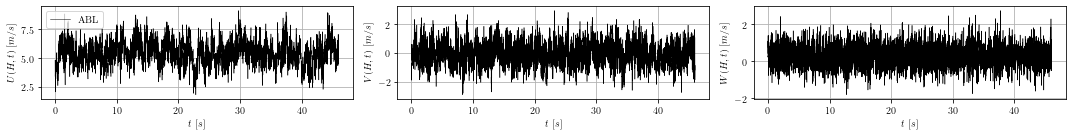

In [103]:
fig = prof_ABL.plotTimeHistory(figSize=[15,2], xLabel=r'$t$ $[s]$', yLabels=[r'$U(H,t)$ $[m/s]$', r'$V(H,t)$ $[m/s]$', r'$W(H,t)$ $[m/s]$'])
fig.savefig(figDir+'timeHistory.svg', bbox_inches='tight')

In [5]:
%pip install pytecplot

# import tecplot as tp
import numpy as np

# dirc = r'D:/OneDrive - The University of Western Ontario\Documents/PhD/Thesis/01-revisitOfWindLoadEvaluation/01.02_Genesis_of_peak/Data/validationPrism/FangAndTachie2021/data_sharing/'

import pytecplot as tp

# Specify the layout file
layout_file = 'D:/OneDrive - The University of Western Ontario/Documents/PhD/Thesis/01-revisitOfWindLoadEvaluation/01.02_Genesis_of_peak/Data/validationPrism/FangAndTachie2021/data_sharing/ALL.lay'

# Load the layout
tp.new_layout()
tp.load_layout(layout_file)

# Specify the data file
data_file = 'D:/OneDrive - The University of Western Ontario/Documents/PhD/Thesis/01-revisitOfWindLoadEvaluation/01.02_Genesis_of_peak/Data/validationPrism/FangAndTachie2021/data_sharing/ALL.dat'

# Load the data
dataset = tp.data.load_tecplot(data_file)

# Access and manipulate data
variables = dataset.variables()
zones = dataset.zones()

# Example: Print the values of a variable in the first zone
print(variables['YourVariable'][zones[0].indices()])




Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'pytecplot'